In [1]:
# imports added for stock time series analysis
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# display 2016_stock_data.csv as dataframe
stock_df = pd.read_csv(
    Path("2016_stock_data.csv"), index_col="date", infer_datetime_format=True, parse_dates=True)
stock_df.head()

,AMZN,AAPL,NFLX
date,,,
2016-04-04,593.190002,25.877037,104.349998
2016-04-05,586.140015,25.571972,104.940002
2016-04-06,602.080017,25.839775,104.830002
2016-04-07,591.429993,25.276215,104.449997
2016-04-08,594.599976,25.304159,103.809998


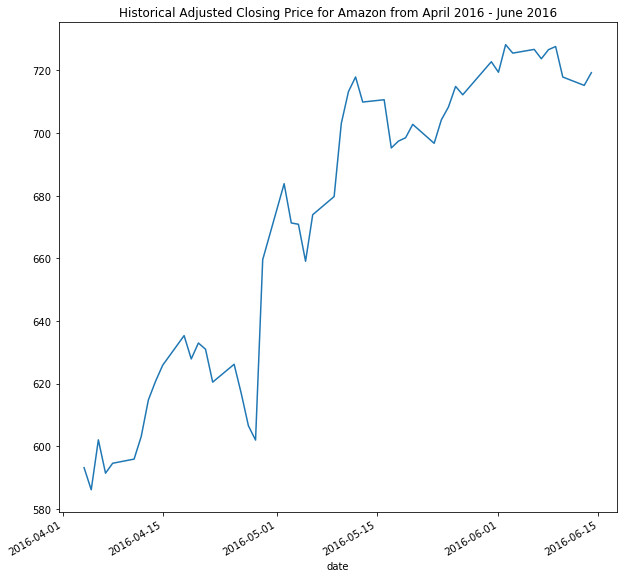

In [3]:
# plot historical adj close price for Amazon
AMZN_plot = stock_df.AMZN.plot(title="Historical Adjusted Closing Price for Amazon from April 2016 - June 2016", figsize=(10,10))

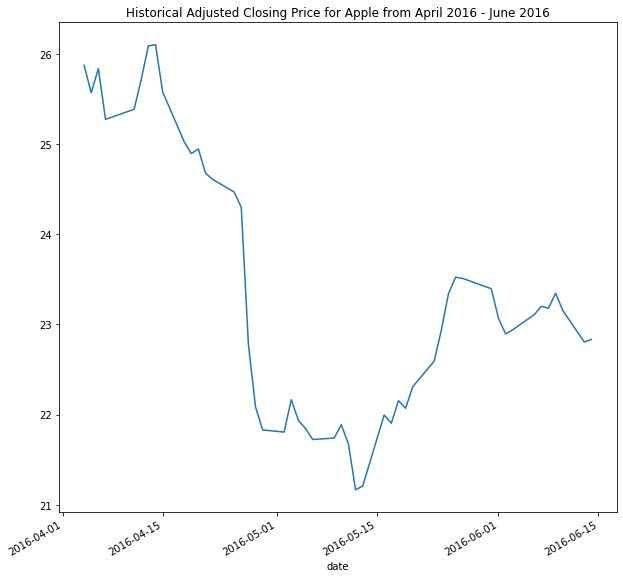

In [4]:
# plot historical adj close price for Apple
AAPL_plot = stock_df.AAPL.plot(title="Historical Adjusted Closing Price for Apple from April 2016 - June 2016", figsize=(10,10))

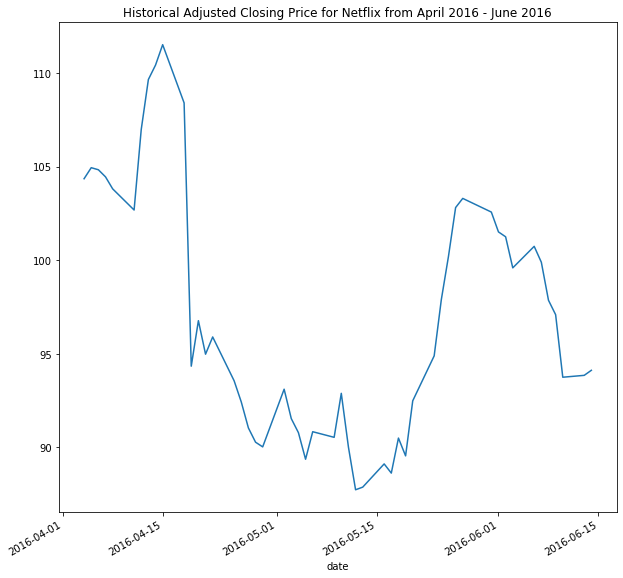

In [5]:
# plot historical adj close price for Netflix
NFLX_plot = stock_df.NFLX.plot(title="Historical Adjusted Closing Price for Netflix from April 2016 - June 2016", figsize=(10,10))

In [6]:
# use Hodrick-Prescott Filter, to decompose Amazon's adjusted close price into two separate series: trend and noise
import statsmodels.api as sm

amzn_noise, amzn_trend = sm.tsa.filters.hpfilter(stock_df["AMZN"])

In [7]:
# Create a dataframe for Amazon's adj close price, and add columns for "noise" and "trend" series from above:
amzn_df = stock_df.loc[:,["AMZN"]]
amzn_df["noise"] = amzn_noise
amzn_df["trend"] = amzn_trend
amzn_df.head()

,AMZN,noise,trend
date,,,
2016-04-04,593.190002,6.795550,586.394452
2016-04-05,586.140015,-3.529370,589.669385
2016-04-06,602.080017,9.131453,592.948565
2016-04-07,591.429993,-4.804040,596.234033
2016-04-08,594.599976,-4.933563,599.533538


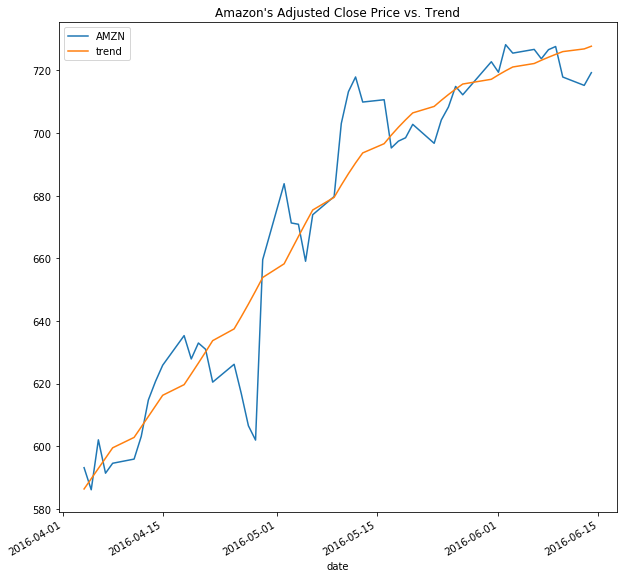

In [8]:
# Plot the adjusted close price vs. the trend for Amazon over the selected time series
amzn_df.plot(y = ["AMZN","trend"], title="Amazon's Adjusted Close Price vs. Trend", figsize=(10,10))

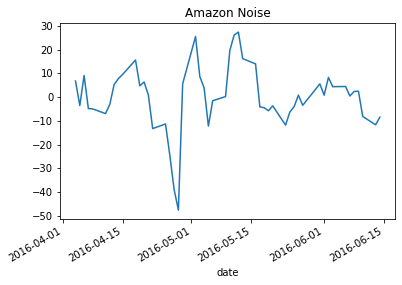

In [9]:
# plot the noise of Amazon
amzn_noise.plot(title="Amazon Noise")

In [10]:
# use Hodrick-Prescott Filter, to decompose Apple's adjusted close price into two separate series: trend and noise
aapl_noise, aapl_trend = sm.tsa.filters.hpfilter(stock_df["AAPL"])

In [11]:
# Create a dataframe for Apple's adj close price, and add columns for "noise" and "trend" series from above:
aapl_df = stock_df.loc[:,["AAPL"]]
aapl_df["noise"] = aapl_noise
aapl_df["trend"] = aapl_trend
aapl_df.head()

,AAPL,noise,trend
date,,,
2016-04-04,25.877037,-0.396133,26.273170
2016-04-05,25.571972,-0.550126,26.122098
2016-04-06,25.839775,-0.131004,25.970779
2016-04-07,25.276215,-0.542406,25.818620
2016-04-08,25.304159,-0.360791,25.664950


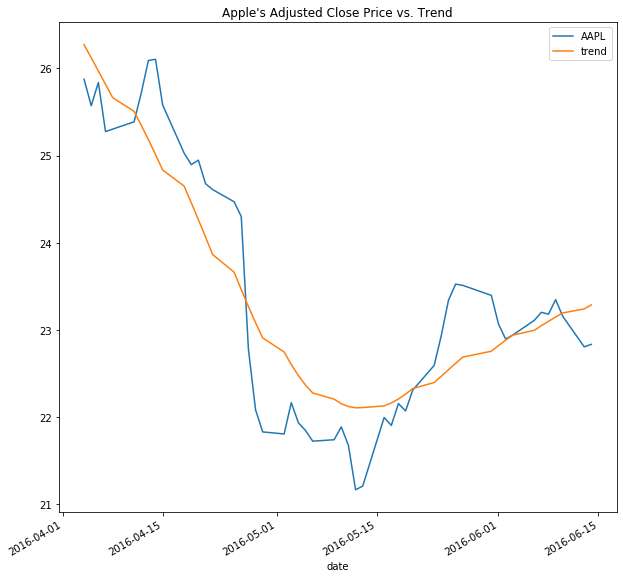

In [12]:
# Plot the adjusted close price vs. the trend for Amazon over the selected time series
aapl_df.plot(y = ["AAPL","trend"], title="Apple's Adjusted Close Price vs. Trend", figsize=(10,10))

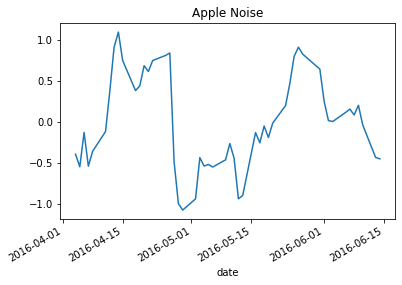

In [13]:
# plot the noise of Apple
aapl_noise.plot(title="Apple Noise")

In [14]:
# use Hodrick-Prescott Filter, to decompose Netflix's adjusted close price into two separate series: trend and noise
nflx_noise, nflx_trend = sm.tsa.filters.hpfilter(stock_df["NFLX"])

In [15]:
# Create a dataframe for Netflix's adj close price, and add columns for "noise" and "trend" series from above:
nflx_df = stock_df.loc[:,["NFLX"]]
nflx_df["noise"] = nflx_noise
nflx_df["trend"] = nflx_trend
nflx_df.head()

,NFLX,noise,trend
date,,,
2016-04-04,104.349998,-3.408431,107.758429
2016-04-05,104.940002,-2.117059,107.057061
2016-04-06,104.830002,-1.523562,106.353563
2016-04-07,104.449997,-1.194485,105.644482
2016-04-08,103.809998,-1.115413,104.925411


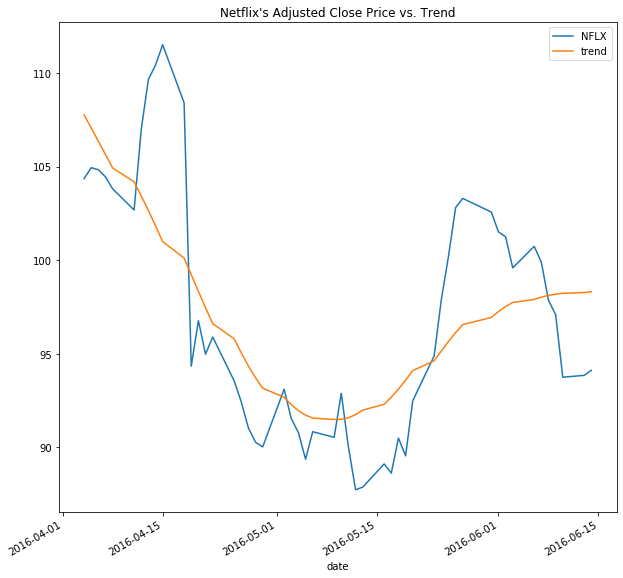

In [16]:
# Plot the adjusted close price vs. the trend for Amazon over the selected time series
nflx_df.plot(y = ["NFLX","trend"], title="Netflix's Adjusted Close Price vs. Trend", figsize=(10,10))

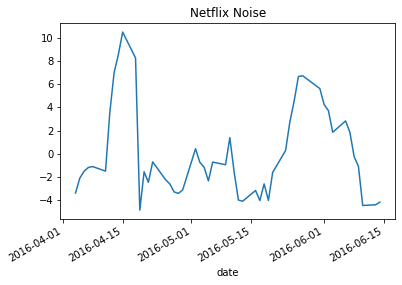

In [17]:
# plot the noise of Netflix
nflx_noise.plot(title="Netflix Noise")

In [18]:
# Forecasting Amazon's Returns using an ARMA Model
# Create a series using Amazon's adjusted close price percentage returns, drop any nan's, and check the results:
amzn_returns = (stock_df[["AMZN"]].pct_change() * 100)
amzn_returns = amzn_returns.replace(-np.inf, np.nan).dropna()
amzn_returns.tail()

,AMZN
date,
2016-06-08,0.400700
2016-06-09,0.138997
2016-06-10,-1.338563
2016-06-13,-0.371911
2016-06-14,0.567641


In [19]:
# import ARMA model
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels with order=(2, 1)
amzn_model = ARMA(amzn_returns.values, order=(2,1))

# Fit the Amazon model and assign it to a variable called amzn_results
amzn_results = amzn_model.fit()

In [20]:
# Output Amazon model summary results:
amzn_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 1)   Log Likelihood                -101.569
Method:                       css-mle   S.D. of innovations              1.829
Date:                Tue, 19 Jan 2021   AIC                            213.139
Time:                        06:02:14   BIC                            222.699
Sample:                             0   HQIC                           216.779
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4003      0.283      1.415      0.157      -0.154       0.955
ar.L1.y       -0.9123        nan        nan        nan         nan         nan
ar.L2.y        0.0877        nan        nan        nan         nan         nan
ma.L1.y        0.9993        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2           11.4076           +0.0000j           11.4076            0.0000
MA.1           -1.0007           +0.0000j            1.0007            0.5000
-----------------------------------------------------------------------------
"""

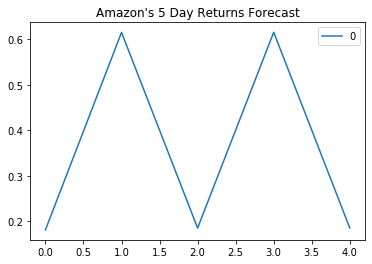

In [21]:
# Plot the 5 Day Returns Forecast for Amazon
pd.DataFrame(amzn_results.forecast(steps=5)[0]).plot(title="Amazon's 5 Day Returns Forecast")

In [22]:
# Forecasting Apple's Returns using an ARMA Model
# Create a series using Apple's adjusted close price percentage returns, drop any nan's, and check the results:
aapl_returns = (stock_df[["AAPL"]].pct_change() * 100)
aapl_returns = aapl_returns.replace(-np.inf, np.nan).dropna()
aapl_returns.tail()

,AAPL
date,
2016-06-08,-0.090879
2016-06-09,0.717606
2016-06-10,-0.822863
2016-06-13,-1.507649
2016-06-14,0.123276


In [23]:
# Estimate and ARMA model using statsmodels with order=(2, 1)
aapl_model = ARMA(aapl_returns.values, order=(2,1))

# Fit the Apple model and assign it to a variable called aapl_results
aapl_results = aapl_model.fit()

/Users/joemazzuca/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [24]:
# Output Apple model summary results:
aapl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 1)   Log Likelihood                -106.779
Method:                       css-mle   S.D. of innovations              1.980
Date:                Tue, 19 Jan 2021   AIC                            223.557
Time:                        06:02:34   BIC                            233.117
Sample:                             0   HQIC                           227.198
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.5821        nan        nan        nan         nan         nan
ar.L1.y       -0.0123      0.001    -12.156      0.000      -0.014      -0.010
ar.L2.y        0.9877        nan        nan        nan         nan         nan
ma.L1.y        1.0000      0.008    119.804      0.000       0.984       1.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2            1.0125           +0.0000j            1.0125            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

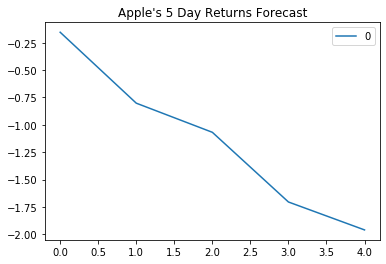

In [25]:
# Plot the 5 Day Returns Forecast for Apple
pd.DataFrame(aapl_results.forecast(steps=5)[0]).plot(title="Apple's 5 Day Returns Forecast")

In [26]:
# Forecasting Netflix's Returns using an ARMA Model
# Create a series using Netlix's adjusted close price percentage returns, drop any nan's, and check the results:
nflx_returns = (stock_df[["NFLX"]].pct_change() * 100)
nflx_returns = nflx_returns.replace(-np.inf, np.nan).dropna()
nflx_returns.tail()

,NFLX
date,
2016-06-08,-2.032234
2016-06-09,-0.786843
2016-06-10,-3.440103
2016-06-13,0.106665
2016-06-14,0.287698


In [27]:
# Estimate and ARMA model using statsmodels with order=(2, 1)
nflx_model = ARMA(nflx_returns.values, order=(2,1))

# Fit the Apple model and assign it to a variable called aapl_results
nflx_results = nflx_model.fit()

In [28]:
# Output Netflix model summary results:
nflx_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 1)   Log Likelihood                -116.861
Method:                       css-mle   S.D. of innovations              2.495
Date:                Tue, 19 Jan 2021   AIC                            243.722
Time:                        06:02:44   BIC                            253.282
Sample:                             0   HQIC                           247.363
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1587      0.420     -0.378      0.706      -0.982       0.665
ar.L1.y       -0.7862      0.165     -4.758      0.000      -1.110      -0.462
ar.L2.y        0.1840      0.142      1.296      0.195      -0.094       0.462
ma.L1.y        0.9157      0.108      8.465      0.000       0.704       1.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0257           +0.0000j            1.0257            0.5000
AR.2            5.2995           +0.0000j            5.2995            0.0000
MA.1           -1.0921           +0.0000j            1.0921            0.5000
-----------------------------------------------------------------------------
"""

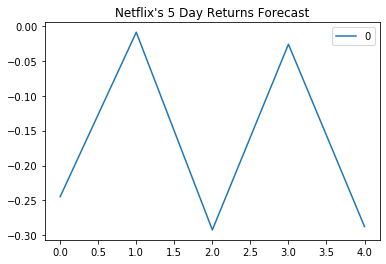

In [29]:
# Plot the 5 Day Returns Forecast for Netflix
pd.DataFrame(nflx_results.forecast(steps=5)[0]).plot(title="Netflix's 5 Day Returns Forecast")

In [33]:
# Forecasting the adj closing price using an ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
amzn_df2 = amzn_df["AMZN"]
amzn_df2.index = pd.DatetimeIndex(amzn_df2).to_period('D')
amzn_arima_model = ARIMA(amzn_df2, order=(5,1,1))

# Fit the model
amzn_arima_results = amzn_arima_model.fit()

In [34]:
# Output model summary results:
amzn_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AMZN   No. Observations:                   50
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -190.588
Method:                       css-mle   S.D. of innovations             10.698
Date:                Tue, 19 Jan 2021   AIC                            397.176
Time:                        06:08:43   BIC                            412.472
Sample:                    01-01-1970   HQIC                           403.001
                         - 01-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9368      0.394      7.459      0.000       2.165       3.708
ar.L1.D.AMZN     0.9442      0.142      6.644      0.000       0.666       1.223
ar.L2.D.AMZN    -0.1232      0.195     -0.633      0.527      -0.505       0.258
ar.L3.D.AMZN    -0.2092      0.199     -1.050      0.294      -0.600       0.181
ar.L4.D.AMZN     0.1936      0.200      0.969      0.333      -0.198       0.585
ar.L5.D.AMZN    -0.0357      0.147     -0.242      0.809      -0.324       0.253
ma.L1.D.AMZN    -1.0000      0.067    -15.003      0.000      -1.131      -0.869
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6656           -0.0000j            1.6656           -0.5000
AR.2            1.3260           -0.0000j            1.3260           -0.0000
AR.3            0.8494           -1.5485j            1.7661           -0.1702
AR.4            0.8494           +1.5485j            1.7661            0.1702
AR.5            4.0685           -0.0000j            4.0685           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

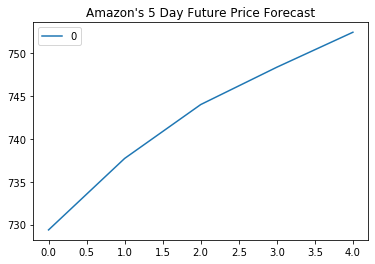

In [35]:
# Plot the 5 Day Price Forecast for Amazon
pd.DataFrame(amzn_arima_results.forecast(steps=5)[0]).plot(title="Amazon's 5 Day Future Price Forecast")

In [36]:
# Estimate and ARIMA Model:
aapl_df2 = aapl_df["AAPL"]
aapl_df2.index = pd.DatetimeIndex(aapl_df2).to_period('D')
aapl_arima_model = ARIMA(aapl_df2, order=(5,1,1))

# Fit the model
aapl_arima_results = aapl_arima_model.fit()

In [37]:
# Output model summary results:
aapl_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AAPL   No. Observations:                   50
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -15.111
Method:                       css-mle   S.D. of innovations              0.327
Date:                Tue, 19 Jan 2021   AIC                             46.223
Time:                        06:11:29   BIC                             61.519
Sample:                    01-01-1970   HQIC                            52.047
                         - 01-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0581      0.074     -0.782      0.434      -0.204       0.088
ar.L1.D.AAPL     0.8870      0.458      1.935      0.053      -0.012       1.785
ar.L2.D.AAPL    -0.1565      0.248     -0.631      0.528      -0.643       0.330
ar.L3.D.AAPL    -0.1575      0.208     -0.757      0.449      -0.565       0.250
ar.L4.D.AAPL     0.0962      0.224      0.430      0.667      -0.342       0.535
ar.L5.D.AAPL     0.0730      0.160      0.456      0.648      -0.240       0.386
ma.L1.D.AAPL    -0.5698      0.440     -1.296      0.195      -1.432       0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2397           -0.0000j            1.2397           -0.0000
AR.2            0.7951           -1.1497j            1.3979           -0.1537
AR.3            0.7951           +1.1497j            1.3979            0.1537
AR.4           -2.0743           -1.1635j            2.3783           -0.4186
AR.5           -2.0743           +1.1635j            2.3783            0.4186
MA.1            1.7550           +0.0000j            1.7550            0.0000
-----------------------------------------------------------------------------
"""

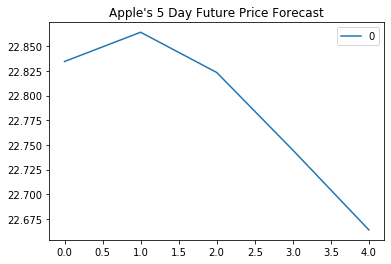

In [38]:
# Plot the 5 Day Price Forecast for Apple
pd.DataFrame(aapl_arima_results.forecast(steps=5)[0]).plot(title="Apple's 5 Day Future Price Forecast")

In [40]:
# Estimate and ARIMA Model:
nflx_df2 = nflx_df["NFLX"]
nflx_df2.index = pd.DatetimeIndex(nflx_df2).to_period('D')
nflx_arima_model = ARIMA(nflx_df2, order=(5,1,1))

# Fit the model
nflx_arima_results = nflx_arima_model.fit()

/Users/joemazzuca/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [41]:
# Output model summary results:
nflx_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.NFLX   No. Observations:                   50
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -119.186
Method:                       css-mle   S.D. of innovations              2.622
Date:                Tue, 19 Jan 2021   AIC                            254.371
Time:                        06:14:44   BIC                            269.668
Sample:                    01-01-1970   HQIC                           260.196
                         - 01-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1930      0.390     -0.495      0.621      -0.957       0.571
ar.L1.D.NFLX    -0.9155      0.139     -6.573      0.000      -1.188      -0.643
ar.L2.D.NFLX     0.1867      0.189      0.987      0.324      -0.184       0.557
ar.L3.D.NFLX     0.0002      0.192      0.001      0.999      -0.377       0.377
ar.L4.D.NFLX    -0.1424      0.189     -0.755      0.450      -0.512       0.227
ar.L5.D.NFLX    -0.0402      0.146     -0.276      0.783      -0.326       0.245
ma.L1.D.NFLX     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0004           -0.0000j            1.0004           -0.5000
AR.2            1.2973           -1.2899j            1.8294           -0.1245
AR.3            1.2973           +1.2899j            1.8294            0.1245
AR.4           -2.5705           -0.9116j            2.7274           -0.4458
AR.5           -2.5705           +0.9116j            2.7274            0.4458
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

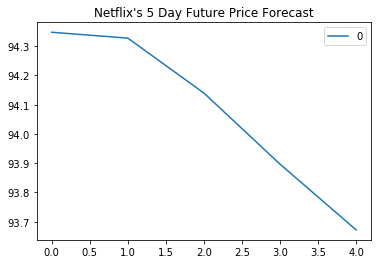

In [42]:
# Plot the 5 Day Price Forecast for Netflix
pd.DataFrame(nflx_arima_results.forecast(steps=5)[0]).plot(title="Netflix's 5 Day Future Price Forecast")

In [43]:
# Volatility Forecasting with GARCH to forecast near-term volatility
from arch import arch_model

In [44]:
# Estimate a GARCH model:
amzn_garch_model = arch_model(amzn_returns, mean="Zero", vol="GARCH", p=2,q=1)
# Fit the model
amzn_garch_results = amzn_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 105.5398036426409
Iteration:      2,   Func. Count:     13,   Neg. LLF: 101.93050198278362
Iteration:      3,   Func. Count:     18,   Neg. LLF: 100.56227411059935
Iteration:      4,   Func. Count:     23,   Neg. LLF: 99.97104776268249
Iteration:      5,   Func. Count:     28,   Neg. LLF: 111.29100829207808
Iteration:      6,   Func. Count:     34,   Neg. LLF: 102.96503425930182
Iteration:      7,   Func. Count:     40,   Neg. LLF: 99.29408906228103
Iteration:      8,   Func. Count:     46,   Neg. LLF: 99.0574495474951
Iteration:      9,   Func. Count:     51,   Neg. LLF: 99.05661466072338
Iteration:     10,   Func. Count:     56,   Neg. LLF: 99.05652920912678
Iteration:     11,   Func. Count:     61,   Neg. LLF: 99.0565199891144
Iteration:     12,   Func. Count:     65,   Neg. LLF: 99.05651997953422
Optimization terminated successfully    (Exit mode 0)
            Current function value: 99.0565199891144
            Iterations: 12


In [45]:
# Summarize the model results
amzn_garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -99.0565
Distribution:                  Normal   AIC:                           206.113
Method:            Maximum Likelihood   BIC:                           213.761
                                        No. Observations:                   50
Date:                Tue, Jan 19 2021   Df Residuals:                       46
Time:                        06:18:44   Df Model:                            4
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.1065      0.661      1.673  9.435e-02   [ -0.190,  2.403]
alpha[1]       0.0660  3.051e-02      2.164  3.044e-02 [6.236e-03,  0.126]
alpha[2]       0.9340      0.836      1.118      0.264   [ -0.704,  2.572]
beta[1]        0.0000      0.168      0.000      1.000   [ -0.329,  0.329]
==========================================================================

Covariance estimator: robust
"""

In [46]:
# Find the last day of the dataset
amzn_last_day = amzn_returns.index.max().strftime('%Y-%m-%d')
amzn_last_day

'2016-06-14'

In [47]:
# Create a 5 day forecast of volatility of Amazon
forecast_horizon = 5

# Start the forecast using the amzn_last_day calculated above
amzn_forecasts = amzn_garch_results.forecast(start=amzn_last_day, horizon=forecast_horizon)
amzn_forecasts

In [48]:
# Annualize the forecast
amzn_intermediate = np.sqrt(amzn_forecasts.variance.dropna() * 252)
amzn_intermediate.head()

,h.1,h.2,h.3,h.4,h.5
date,,,,,
2016-06-14,17.797542,19.380174,24.484165,25.869151,29.713904


In [49]:
# Transpose the forecast so that it is easier to plot
amzn_final = amzn_intermediate.dropna().T
amzn_final.head()

date,2016-06-14
h.1,17.797542
h.2,19.380174
h.3,24.484165
h.4,25.869151
h.5,29.713904


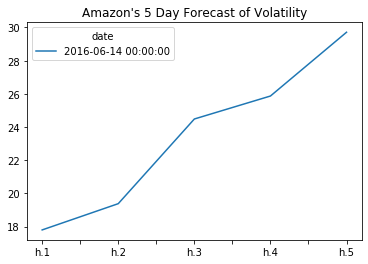

In [50]:
# Plot the final forecast
amzn_final.plot(title="Amazon's 5 Day Forecast of Volatility")

In [51]:
# Estimate a GARCH model:
aapl_garch_model = arch_model(aapl_returns, mean="Zero", vol="GARCH", p=2,q=1)
# Fit the model
aapl_garch_results = aapl_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97.0957407331263
Iteration:      2,   Func. Count:     14,   Neg. LLF: 97.8610430406532
Iteration:      3,   Func. Count:     21,   Neg. LLF: 91.4805398797317
Iteration:      4,   Func. Count:     26,   Neg. LLF: 91.3639594138979
Iteration:      5,   Func. Count:     31,   Neg. LLF: 91.36281610829694
Iteration:      6,   Func. Count:     36,   Neg. LLF: 91.36219728331177
Iteration:      7,   Func. Count:     41,   Neg. LLF: 91.3621751482458
Iteration:      8,   Func. Count:     46,   Neg. LLF: 91.36215656821439
Iteration:      9,   Func. Count:     50,   Neg. LLF: 91.36215657204362
Optimization terminated successfully    (Exit mode 0)
            Current function value: 91.36215656821439
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9


In [52]:
# Summarize the model results
aapl_garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -91.3622
Distribution:                  Normal   AIC:                           190.724
Method:            Maximum Likelihood   BIC:                           198.372
                                        No. Observations:                   50
Date:                Tue, Jan 19 2021   Df Residuals:                       46
Time:                        06:24:05   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          2.1711      1.560      1.392      0.164      [ -0.887,  5.229]
alpha[1]       0.0436  4.596e-02      0.949      0.343   [-4.645e-02,  0.134]
alpha[2]       0.0000  2.867e-02      0.000      1.000 [-5.619e-02,5.619e-02]
beta[1]    4.5422e-15      0.509  8.929e-15      1.000      [ -0.997,  0.997]
=============================================================================

Covariance estimator: robust
"""

In [53]:
# Find the last day of the dataset
aapl_last_day = aapl_returns.index.max().strftime('%Y-%m-%d')
aapl_last_day

'2016-06-14'

In [54]:
# Create a 5 day forecast of volatility of Apple
# Start the forecast using the aapl_last_day calculated above
aapl_forecasts = aapl_garch_results.forecast(start=aapl_last_day, horizon=forecast_horizon)
aapl_forecasts

In [55]:
# Annualize the forecast
aapl_intermediate = np.sqrt(aapl_forecasts.variance.dropna() * 252)
aapl_intermediate.head()

,h.1,h.2,h.3,h.4,h.5
date,,,,,
2016-06-14,23.394375,23.89572,23.917352,23.918295,23.918336


In [56]:
# Transpose the forecast so that it is easier to plot
aapl_final = aapl_intermediate.dropna().T
aapl_final.head()

date,2016-06-14
h.1,23.394375
h.2,23.895720
h.3,23.917352
h.4,23.918295
h.5,23.918336


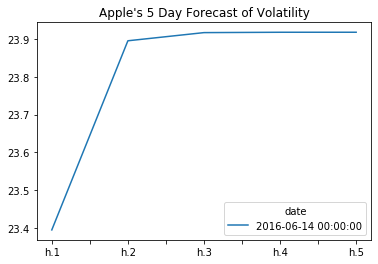

In [57]:
# Plot the final forecast
aapl_final.plot(title="Apple's 5 Day Forecast of Volatility")

In [58]:
# Estimate a GARCH model:
nflx_garch_model = arch_model(nflx_returns, mean="Zero", vol="GARCH", p=2,q=1)
# Fit the model
nflx_garch_results = nflx_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24308407.05658558
Iteration:      2,   Func. Count:     13,   Neg. LLF: 117.83409011028283
Iteration:      3,   Func. Count:     18,   Neg. LLF: 118.20950953245703
Iteration:      4,   Func. Count:     25,   Neg. LLF: 116.63120681259102
Iteration:      5,   Func. Count:     30,   Neg. LLF: 116.33372659896209
Iteration:      6,   Func. Count:     35,   Neg. LLF: 116.10324805504982
Iteration:      7,   Func. Count:     40,   Neg. LLF: 116.09943227299455
Iteration:      8,   Func. Count:     45,   Neg. LLF: 116.09942138340882
Iteration:      9,   Func. Count:     49,   Neg. LLF: 116.09942138353152
Optimization terminated successfully    (Exit mode 0)
            Current function value: 116.09942138340882
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9


In [59]:
# Summarize the model results
nflx_garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   NFLX   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -116.099
Distribution:                  Normal   AIC:                           240.199
Method:            Maximum Likelihood   BIC:                           247.847
                                        No. Observations:                   50
Date:                Tue, Jan 19 2021   Df Residuals:                       46
Time:                        06:29:11   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3096e-09      0.487  2.689e-09      1.000      [ -0.954,  0.954]
alpha[1]   6.5051e-10      0.120  5.428e-09      1.000      [ -0.235,  0.235]
alpha[2]   6.2922e-10  4.899e-02  1.284e-08      1.000 [-9.602e-02,9.602e-02]
beta[1]        0.9785      0.149      6.548  5.830e-11      [  0.686,  1.271]
=============================================================================

Covariance estimator: robust
"""

In [60]:
# Find the last day of the dataset
nflx_last_day = nflx_returns.index.max().strftime('%Y-%m-%d')
nflx_last_day

'2016-06-14'

In [61]:
# Create a 5 day forecast of volatility of Netflix
# Start the forecast using the nflx_last_day calculated above
nflx_forecasts = nflx_garch_results.forecast(start=nflx_last_day, horizon=forecast_horizon)
nflx_forecasts

In [62]:
# Annualize the forecast
nflx_intermediate = np.sqrt(nflx_forecasts.variance.dropna() * 252)
nflx_intermediate.head()

,h.1,h.2,h.3,h.4,h.5
date,,,,,
2016-06-14,27.242225,26.947358,26.655683,26.367165,26.08177


In [63]:
# Transpose the forecast so that it is easier to plot
nflx_final = nflx_intermediate.dropna().T
nflx_final.head()

date,2016-06-14
h.1,27.242225
h.2,26.947358
h.3,26.655683
h.4,26.367165
h.5,26.081770


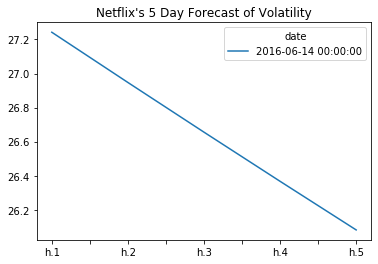

In [64]:
# Plot the final forecast
nflx_final.plot(title="Netflix's 5 Day Forecast of Volatility")